# Homography

Submitted by: Ephi Frankel


In [1]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2  



### 1. warm up

Load the 'cereals_query' and 'cereals_frame' images.

Calculate SIFT keypoints, and try to find best matches. Use these matches to estimate the Homography parameters (using RANSAC). Mark the transformed box of the query image on top of the 'cereals_frame' image.

useful links:

https://www.learnopencv.com/homography-examples-using-opencv-python-c/

http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html#feature-homography


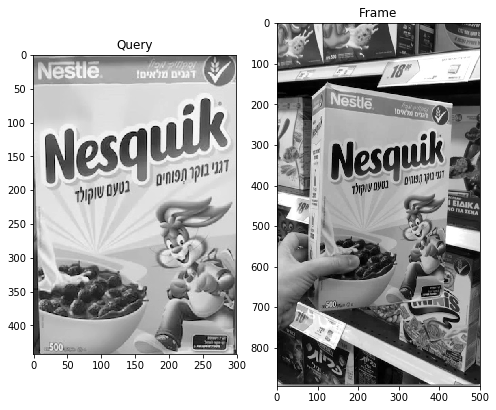

In [2]:
# your code here...
cereals_query = cv2.imread('cereals_query.jpg',0)
cereals_frame = cv2.imread('cereals_frame.jpg',0)
plt.figure(figsize=(8,16))
plt.subplot(1,2,1)
plt.title('Query')
plt.imshow(cereals_query, cmap='gray')
plt.subplot(1,2,2)
plt.title('Frame')
plt.imshow(cereals_frame, cmap='gray')
plt.show()

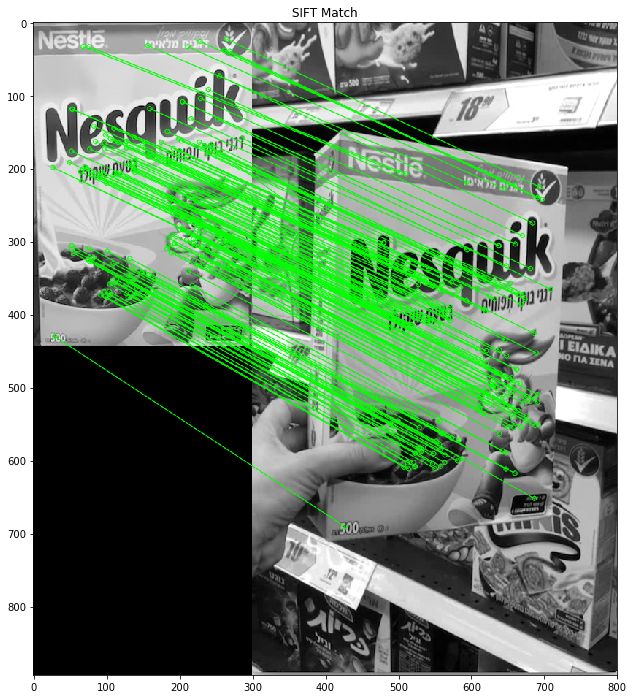

In [3]:
#calculating SIFT (and displaying match for debugging)
def ratioTest(matches):
    good = []
    for m,n in matches:
        if m.distance < 0.5*n.distance:
            good.append([m])
    return good
#sift object (cornder detection & description)
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(cereals_query,None)
kpSource, desSource = sift.detectAndCompute(cereals_frame,None)
#brute force matching with Knn Match
bf = cv2.BFMatcher()
good1 = ratioTest(bf.knnMatch(des1,desSource, k=2)) #match and pass through test
imgResult = cv2.drawMatchesKnn(cereals_query,kp1,cereals_frame,kpSource,good1,outImg=None,
                          flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS,matchColor= (0,255,0))
plt.figure(figsize=(18,12))
plt.title("SIFT Match")
plt.imshow(imgResult)
plt.show()

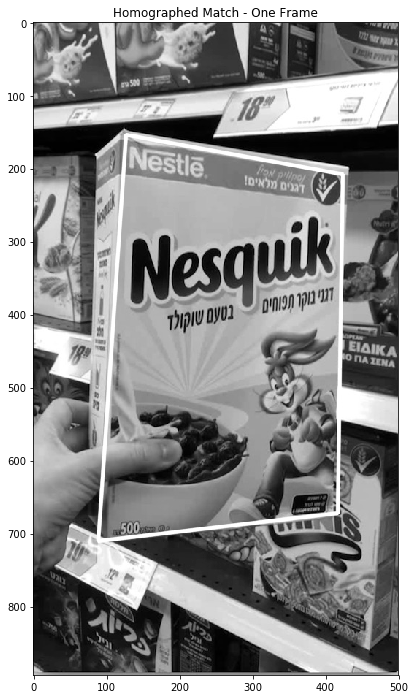

In [4]:
#one frame homography
good = np.array(good1)
good = good.flatten()
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kpSource[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
h,w = cereals_query.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,H)
homographed_cereals_frame = cv2.polylines(cereals_frame,[np.int32(dst)],True,(255,0,0),3, cv2.LINE_AA)
plt.figure(figsize=(18,12))
plt.title("Homographed Match - One Frame")
plt.imshow(homographed_cereals_frame,cmap='gray')
plt.show()

### 2. lets make a movie!

Load each and every frame in the 'cereals_movie' file, and repeat the same analysis as before. For each input frame, generate an output frame with the transormed box of the query image on top (check that you have enough 'good matched' before). Generate an output movie from all the output frames. 

Submit both the `.ipynb` notebook and your movie file.

In case the movie frames are too big, you can rescale them to a lower resolution, before performing your analysis. 


In [5]:
# your code here...
def ratioTestVid(matches):
    good = []
    for m,n in matches:
        if m.distance < 0.5*n.distance:
            good.append(m)
    return good
# play and save a movie
cap = cv2.VideoCapture('cereals_movie.mp4')
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('cereals_movie_homographed.mp4',fourcc, 20.0, (540,960))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==False:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    kpSource, desSource = sift.detectAndCompute(gray,None)
    good1 = ratioTestVid(bf.knnMatch(des1,desSource, k=2)) #match and pass through test
    framePrint = frame
    if(len(good1) > 10):
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good1 ]).reshape(-1,1,2)
        dst_pts = np.float32([ kpSource[m.trainIdx].pt for m in good1 ]).reshape(-1,1,2)
        H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        h,w = cereals_query.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,H)
        homographed_cereals_frame = cv2.polylines(frame,[np.int32(dst)],True,(255,0,0),3, cv2.LINE_AA)
        framePrint = homographed_cereals_frame
    cv2.imshow('window title',framePrint)
    out.write(framePrint)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()


## Good Luck!